<a href="https://colab.research.google.com/github/githubdcw/KU-WPT/blob/main/data/s1p/inductance_from_s1p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install https://scikit-rf.readthedocs.io/en/latest/

In [1]:
!pip -q install scikit-rf 

     |████████████████████████████████| 3.2 MB 5.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import skrf as rf
from skrf import Network, Frequency
import scipy.constants as const
e0 =const.epsilon_0

## Sonnet file
https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s1p/sq_coil001.son

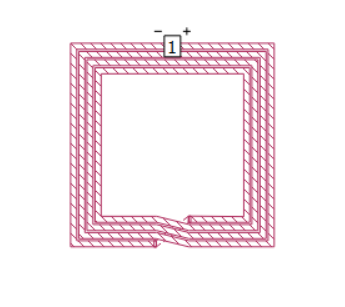

Download simulated result for square coil.

In [3]:
!wget https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s1p/sq_coil001.s1p

--2022-12-10 15:10:05--  https://raw.githubusercontent.com/githubdcw/KU-WPT/main/data/s1p/sq_coil001.s1p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘sq_coil001.s1p’

sq_coil001.s1p      100%[===================>]     322  --.-KB/s    in 0s      

2022-12-10 15:10:05 (12.7 MB/s) - ‘sq_coil001.s1p’ saved [322/322]



Load data to Network.

In [4]:
coil = Network('/content/sq_coil001.s1p')

In [5]:
print(coil)

1-Port Network: 'sq_coil001',  0.013-0.014 GHz, 2 pts, z0=[50.+0.j]


Find INPUT impedance of the coil.

In [30]:
Z = coil.z
print(Z)

[[[0.37965867+240.3444268j ]]

 [[0.49415637+263.95788767j]]]


Find Inducetance.  
$X_L = 2 \pi f L$  
$L = \frac {X_L}{2 \pi f}

In [33]:
tmp = Z
print('Inductance of the coil at', coil.frequency.f[0],'Hz is', tmp [0][0][0].imag/(2*np.pi*coil.frequency.f[0]), 'H')
print('Inductance of the coil at', coil.frequency.f[1],'Hz is', tmp [1][0][0].imag/(2*np.pi*coil.frequency.f[1]), 'H')


Inductance of the coil at 13000000.0 Hz is 2.9424618131173603e-06 H
Inductance of the coil at 14000000.0 Hz is 3.0007287565006473e-06 H


In [38]:
tmp = Z
print('Inductance of the coil at', coil.frequency.f[0]/1e6,'MHz is', "{:.2f}".format(tmp [0][0][0].imag/(2*np.pi*coil.frequency.f[0])*1e6), 'uH')
print('Inductance of the coil at', coil.frequency.f[1]/1e6,'MHz is', "{:.2f}".format(tmp [1][0][0].imag/(2*np.pi*coil.frequency.f[1])*1e6), 'uH')


Inductance of the coil at 13.0 MHz is 2.94 uH
Inductance of the coil at 14.0 MHz is 3.00 uH
